# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Bandit-Convex-Optimization" data-toc-modified-id="Bandit-Convex-Optimization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bandit Convex Optimization</a></div><div class="lev1 toc-item"><a href="#Plot-results" data-toc-modified-id="Plot-results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot results</a></div><div class="lev2 toc-item"><a href="#2D-evolution-of-density" data-toc-modified-id="2D-evolution-of-density-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2D evolution of density</a></div><div class="lev2 toc-item"><a href="#3D-density" data-toc-modified-id="3D-density-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>3D density</a></div>

# Bandit Convex Optimization

In [1]:
%pylab inline
import sys
sys.path.append('/Users/berkas/Dropbox/school/phd/machine-learning/code/ActiveLearning')

Populating the interactive namespace from numpy and matplotlib


In [8]:
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import ActiveLearning

In [4]:
invLoss = ActiveLearning.LossRegret.inverseLoss
ogdStep = ActiveLearning.OnlineGradientDescent.ogdStep
splxProj = ActiveLearning.Projection.ProjSimplex
mab = ActiveLearning.MultiArmedBandit.simpleMAB

In [5]:
nMax = 10
TMax = 1000
xHat = mab(n=nMax, T=TMax, delta=.5,
           algOCO=ogdStep, actionLoss=invLoss, 
           actionLossVerbose=False)

# Plot results

## 2D evolution of density

In [6]:
cmBlues = plt.cm.Blues(np.linspace(0, 1, TMax), alpha=.3)

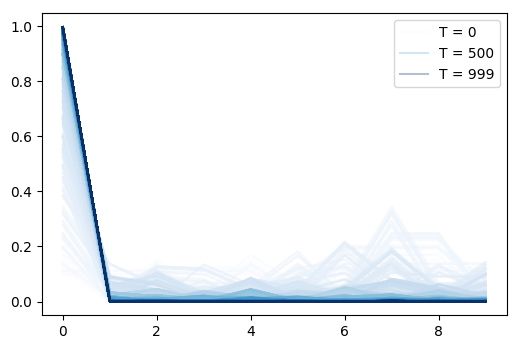

In [7]:
for j in range(TMax):
    if j in [0, int(np.floor(TMax/2)), TMax-1]:
        plt.plot(xHat[:, j], color=cmBlues[j], label='T = {}'.format(j))
    else:
        plt.plot(xHat[:, j], color=cmBlues[j])
plt.legend();

## 3D density

In [9]:
[nmesh, Tmesh] = np.meshgrid(range(nMax), range(TMax+1), indexing='ij')

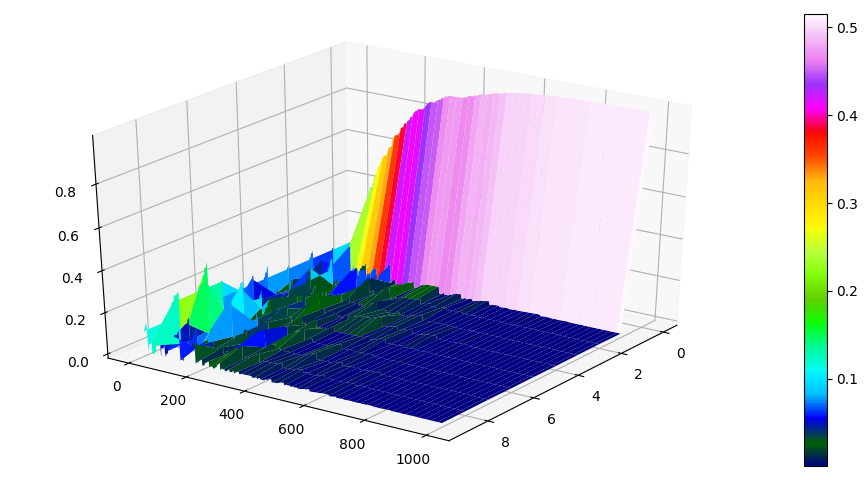

In [10]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
img = ax.plot_surface(nmesh, Tmesh, xHat, cmap=plt.cm.gist_ncar);
plt.colorbar(img);
ax.view_init(azim=35)